In [1]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("wineQualityWhites.csv", index_col = 0) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4898 entries, 1 to 4898
Data columns (total 12 columns):
fixed.acidity           4898 non-null float64
volatile.acidity        4898 non-null float64
citric.acid             4898 non-null float64
residual.sugar          4898 non-null float64
chlorides               4898 non-null float64
free.sulfur.dioxide     4898 non-null float64
total.sulfur.dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 497.5 KB


In [3]:
np.sum(pd.isnull(df).sum()) # Sum of the count of null objects in all columns of data frame

0

# 1. 数据处理:
(1)按原有数据的7个level进行分析 （2）根据7个level划分白酒品质（好，中，差）再进行分析

***Quality level: 3,4,5,6,7,8,9***

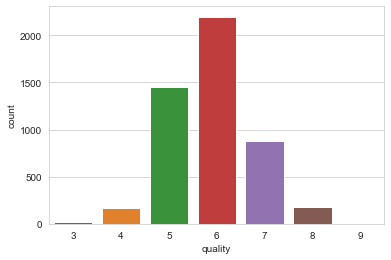

In [4]:
sns.set_style('whitegrid')
sns.countplot(x='quality',data=df)

In [5]:
data_table=df['quality'].value_counts()
data_table

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

***Quality level: bad(3,4) - 1, medium(5,6) - 2, good(7,8,9) - 3***

In [6]:
def create_quality_level(df):
    if df['quality'] >= 7:
        return 3 #good
    elif df['quality'] >= 5:
        return 2 #medium
    else:
        return 1 #bad

In [7]:
df['quality_level'] = df.apply(create_quality_level, axis = 1)
df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,quality_level
1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,2
2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,2
3,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,2
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,2
5,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,2


In [8]:
df_3level = df.drop('quality', axis = 1)
df_3level.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality_level
1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,2
2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,2
3,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,2
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2
5,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2


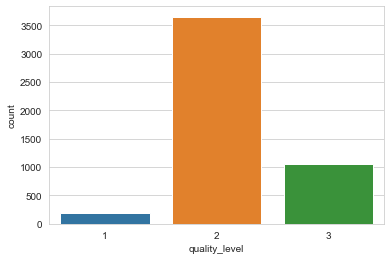

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='quality_level',data=df_3level)

# 2. Machine Learning

## 划分训练集

***(1) 7 Quality level***

In [11]:
df_feat = df.drop('quality',axis=1) # Define a dataframe with only features
df_feat = df_feat.drop('quality_level',axis = 1)
df_target=df['quality']
df_feat.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
3,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
5,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [12]:
X_train, X_test, y_train, y_test = train_test_split(df_feat, df_target, test_size=0.30, random_state=101)

***(2) 3 Quality Level***

In [13]:
df_3level_feat = df_3level.drop('quality_level',axis=1) # Define a dataframe with only features
df_3level_target=df_3level['quality_level']
df_3level_feat.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
3,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
5,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [14]:
X_3level_train, X_3level_test, y_3level_train, y_3level_test = train_test_split(df_3level_feat, df_3level_target, test_size=0.30, random_state=101)

## Algorithm 1: SVC

In [15]:
from sklearn.svm import SVC

***(1) 7 Quality Level***

In [16]:
model = SVC(kernel='rbf',class_weight='balanced')

In [17]:
model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [18]:
#Accuracy
model.score(X_test, y_test)

0.5040816326530613

In [19]:
#Prediction Performance
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.11      0.11      0.11        55
           5       0.52      0.58      0.55       438
           6       0.60      0.50      0.55       666
           7       0.42      0.49      0.45       251
           8       0.34      0.39      0.37        54
           9       0.00      0.00      0.00         1

    accuracy                           0.50      1470
   macro avg       0.28      0.30      0.29      1470
weighted avg       0.51      0.50      0.51      1470

[[  0   1   1   3   0   0   0]
 [  0   6  28  17   3   1   0]
 [  2  16 256 126  33   5   0]
 [  1  23 173 335 118  15   1]
 [  0  10  29  69 123  19   1]
 [  0   0   5  13  15  21   0]
 [  0   0   1   0   0   0   0]]


***(2) 3 Quality Level***

In [20]:
model_3level = SVC(kernel='rbf',class_weight='balanced')

In [21]:
model_3level.fit(X_3level_train,y_3level_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [22]:
#Accuracy
model_3level.score(X_3level_test, y_3level_test)

0.7272108843537415

In [23]:
#Prediction Performance
y_3level_pred = model_3level.predict(X_3level_test)
print(classification_report(y_3level_test, y_3level_pred))
print(confusion_matrix(y_3level_test, y_3level_pred))

              precision    recall  f1-score   support

           1       0.17      0.13      0.15        60
           2       0.85      0.78      0.81      1104
           3       0.49      0.64      0.55       306

    accuracy                           0.73      1470
   macro avg       0.50      0.52      0.51      1470
weighted avg       0.74      0.73      0.73      1470

[[  8  50   2]
 [ 34 866 204]
 [  5 106 195]]


## Algorithm 2: KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier

***(1) 7 Quality Level***

In [25]:
knn = KNeighborsClassifier(n_neighbors=7)

In [26]:
# Fit the classifier to the training data
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [27]:
knn.score(X_test,y_test)

0.45374149659863944

In [28]:
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.23      0.11      0.15        55
           5       0.43      0.48      0.45       438
           6       0.51      0.58      0.54       666
           7       0.32      0.22      0.26       251
           8       0.47      0.17      0.25        54
           9       0.00      0.00      0.00         1

    accuracy                           0.45      1470
   macro avg       0.28      0.22      0.24      1470
weighted avg       0.44      0.45      0.44      1470

[[  0   0   2   3   0   0   0]
 [  0   6  30  15   3   1   0]
 [  0   9 210 189  26   4   0]
 [  0   9 187 387  78   5   0]
 [  0   1  52 143  55   0   0]
 [  0   1   9  24  11   9   0]
 [  0   0   1   0   0   0   0]]


***(2) 3 Quality Level***

In [29]:
knn_3level = KNeighborsClassifier(n_neighbors=7)

In [30]:
knn_3level.fit(X_3level_train,y_3level_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [31]:
knn_3level.score(X_3level_test,y_3level_test)

0.7210884353741497

In [32]:
y_3level_pred_knn = knn_3level.predict(X_3level_test)
print(classification_report(y_3level_test, y_3level_pred_knn))
print(confusion_matrix(y_3level_test, y_3level_pred_knn))

              precision    recall  f1-score   support

           1       0.23      0.05      0.08        60
           2       0.78      0.88      0.83      1104
           3       0.40      0.26      0.32       306

    accuracy                           0.72      1470
   macro avg       0.47      0.40      0.41      1470
weighted avg       0.68      0.72      0.69      1470

[[  3  54   3]
 [ 10 976 118]
 [  0 225  81]]


## Algorithm 3: Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

***(1) 7 Quality Level***

In [34]:
rf = RandomForestClassifier(n_estimators=100, bootstrap = True, max_features = 'sqrt')

In [35]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
rf.score(X_test, y_test)

0.672108843537415

In [37]:
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.69      0.16      0.26        55
           5       0.68      0.70      0.69       438
           6       0.66      0.77      0.71       666
           7       0.69      0.55      0.62       251
           8       0.83      0.37      0.51        54
           9       0.00      0.00      0.00         1

    accuracy                           0.67      1470
   macro avg       0.51      0.37      0.40      1470
weighted avg       0.68      0.67      0.66      1470

[[  0   0   3   2   0   0   0]
 [  0   9  31  15   0   0   0]
 [  0   2 307 127   2   0   0]
 [  0   2 102 513  46   3   0]
 [  0   0   9 102 139   1   0]
 [  0   0   2  19  13  20   0]
 [  0   0   0   1   0   0   0]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [40]:
fi = pd.DataFrame({'feature': list(X_train.columns), 'importance': rf.feature_importances_}).sort_values('importance', ascending = False)
fi

,feature,importance
10,alcohol,0.115922
7,density,0.104939
1,volatile.acidity,0.098768
5,free.sulfur.dioxide,0.095562
6,total.sulfur.dioxide,0.092112
3,residual.sugar,0.088434
4,chlorides,0.084986
8,pH,0.084772
2,citric.acid,0.081603
9,sulphates,0.078099


***(2) 3 Quality Level***

In [42]:
rf_3level = RandomForestClassifier(n_estimators=100, bootstrap = True, max_features = 'sqrt')

In [43]:
rf_3level.fit(X_3level_train, y_3level_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [44]:
rf_3level.score(X_3level_test, y_3level_test)

0.8367346938775511

In [45]:
y_3level_pred_rf = rf_3level.predict(X_3level_test)
print(classification_report(y_3level_test, y_3level_pred_rf))
print(confusion_matrix(y_3level_test, y_3level_pred_rf))

              precision    recall  f1-score   support

           1       0.80      0.13      0.23        60
           2       0.86      0.94      0.90      1104
           3       0.74      0.60      0.66       306

    accuracy                           0.84      1470
   macro avg       0.80      0.56      0.60      1470
weighted avg       0.83      0.84      0.82      1470

[[   8   52    0]
 [   2 1038   64]
 [   0  122  184]]


In [46]:
fi_3level = pd.DataFrame({'feature': list(X_3level_train.columns), 'importance': rf_3level.feature_importances_}).sort_values('importance', ascending = False)
fi

,feature,importance
10,alcohol,0.115922
7,density,0.104939
1,volatile.acidity,0.098768
5,free.sulfur.dioxide,0.095562
6,total.sulfur.dioxide,0.092112
3,residual.sugar,0.088434
4,chlorides,0.084986
8,pH,0.084772
2,citric.acid,0.081603
9,sulphates,0.078099
